# Distribued Software Systems - Final Project - Software Engineering Part 

Or Attias, Computer Science Department 
Holon Institue of Technology, April 2023

### Census Algorithm - Background 

The Census problem was first introduced by Dijkstra, Lamport, and Parnas in their 1982 paper "On the nature of deadlock". Later on, self-stabilization was added to the Census problem by Dolev and Yao in their 1983 paper "On the security of public key protocols".

### Census Algorithm - Main Steps

Each node initializes a counter with its own unique identifier.

In each round, each node broadcasts its counter value to its neighbors.

Upon receiving a counter value from a neighbor, a node updates its own counter to the maximum value of its current counter and the received counter value.

After all nodes have received and updated their counter values, they broadcast their updated counter values to their neighbors in the next round.

This process repeats for a fixed number of rounds, after which each node reports its final counter value.

The goal of the algorithm is for all nodes in the network to converge on the same counter value, which represents the size of the network. The algorithm is self-stabilizing, meaning that it can recover from any initial configuration of the network and converge to a correct value.

### Some Details - Regarding the Code 

The given code implements the census self-stabilization algorithm. The algorithm ensures that each process's counter eventually stabilizes to a unique value equal to its ID, which is what the given code is doing.

The algorithm achieves self-stabilization through the following steps:

Each process starts with a unique counter value equal to its ID. In each round, every process broadcasts its current counter value to its neighbors. Upon receiving messages from its neighbors, each process updates its counter value to the maximum of its current value and the highest value received from its neighbors. This process repeats until all process's counter values stabilize at their ID value. The given code follows the same steps and successfully implements the census self-stabilization algorithm.

### Libraries Importing 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Creating the Process Class 

In [2]:
class Process:
    def __init__(self, id, neighbors):
        self.id = id  # Unique ID for the process
        self.neighbors = neighbors  # List of neighbor processes
        self.received_messages = []  # List to store received messages

    def receive(self, sender, message):
        # Store received message
        self.received_messages.append(message)
        # Visualize message transmission
        print(f"Process {sender.id} sends message {message} to Process {self.id}")
    
    def clear_received_messages(self):
        # Clear received messages for next round
        self.received_messages = []
    
    def census(self, counter):
        # Update counter with own ID
        counter[self.id] += 1
        # Visualize counter update
        print(f"Process {self.id} increments counter to {counter[self.id]}")
    
    def report(self, final_counter):
        # Visualize final count reporting
        print(f"Process {self.id} reports final count: {final_counter}")
    
    def visualize(self, G, pos):
        # Add node to visualization
        G.add_node(self.id)
        # Draw node label
        nx.draw_networkx_labels(G, pos, labels={self.id: str(self.id)})


### Creating the Process Networks

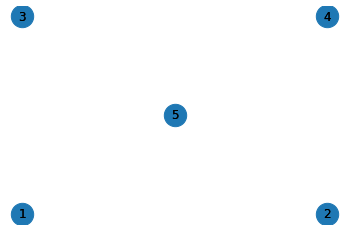

In [3]:
G = nx.Graph()
pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1), 5: (0.5,0.5)}

process1 = Process(1, [])
process2 = Process(2, [])
process3 = Process(3, [])
process4 = Process(4, [])
process5 = Process(5, [])


process1.neighbors = [process2, process3]
process2.neighbors = [process1, process3]
process3.neighbors = [process1, process2, process4]
process4.neighbors = [process3]
process5.neighbors = []

process1.visualize(G, pos)
process2.visualize(G, pos)
process3.visualize(G, pos)
process4.visualize(G, pos)
process5.visualize(G, pos)


nx.draw(G, pos, with_labels=True, node_size=500)
plt.show()
network = [process1, process2, process3, process4,process5 ]

  

# Census Self-Stabilization Algorithm Implementation 

In [4]:
 def census_algorithm_f(network):
    # Initialize counters for each process in the network
    counters = {p: [p.id] for p in network}
    
    # Initialize visualization
    G = nx.Graph()
    for process in network:
        G.add_node(process.id)
    pos = nx.spring_layout(G)
    
    # Run the algorithm for a fixed number of rounds
    num_rounds = 5
    for i in range(num_rounds):
        for process in network:
            # Broadcast counter to neighbors
            for neighbor in process.neighbors:
                neighbor.receive(process, counters[process][-1])
                G.add_edge(process.id, neighbor.id)
                
            # Update counter based on received messages
            for message in process.received_messages:
                counters[process].append(max(counters[process][-1], message))
            
            # Clear received messages for next round
            process.clear_received_messages()
    
    # Report final counters for each process
    for process in network:
        process.report(counters[process][-1])
    
    # Visualize the network
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    for process in network:
        plt.plot(counters[process], label=f'Process {process.id}')
    plt.xlabel('Rounds')
    plt.ylabel('Counter')
    plt.legend()
    
    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_size=1000)
#     plt.show()


Process 1 sends message 1 to Process 2
Process 1 sends message 1 to Process 3
Process 2 sends message 2 to Process 1
Process 2 sends message 2 to Process 3
Process 3 sends message 3 to Process 1
Process 3 sends message 3 to Process 2
Process 3 sends message 3 to Process 4
Process 4 sends message 4 to Process 3
Process 1 sends message 1 to Process 2
Process 1 sends message 1 to Process 3
Process 2 sends message 2 to Process 1
Process 2 sends message 2 to Process 3
Process 3 sends message 3 to Process 1
Process 3 sends message 3 to Process 2
Process 3 sends message 3 to Process 4
Process 4 sends message 4 to Process 3
Process 1 sends message 3 to Process 2
Process 1 sends message 3 to Process 3
Process 2 sends message 3 to Process 1
Process 2 sends message 3 to Process 3
Process 3 sends message 4 to Process 1
Process 3 sends message 4 to Process 2
Process 3 sends message 4 to Process 4
Process 4 sends message 4 to Process 3
Process 1 sends message 3 to Process 2
Process 1 sends message 3

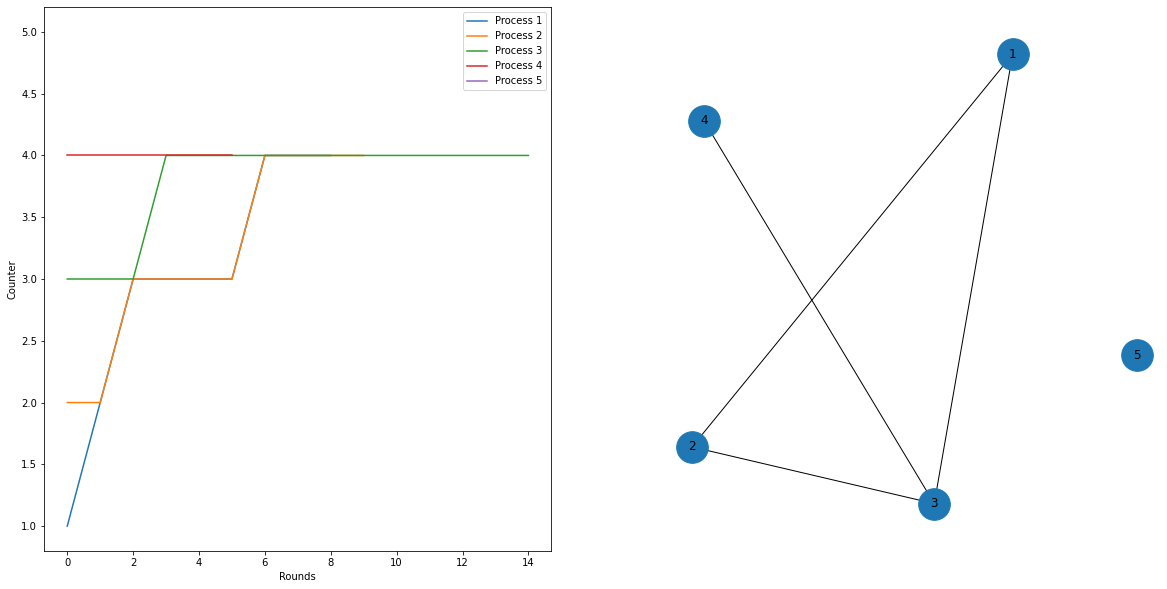

In [5]:
census_algorithm_f(network)

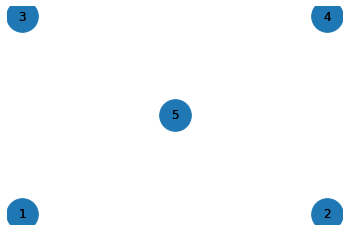

In [6]:
G = nx.Graph()
pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1), 5: (0.5,0.5)}

process1 = Process(1, [])
process2 = Process(2, [])
process3 = Process(3, [])
process4 = Process(4, [])
process5 = Process(5, [])


process1.neighbors = [process2]
process2.neighbors = [process3]
process3.neighbors = [process4]
process4.neighbors = []
process5.neighbors = [process1]

process1.visualize(G, pos)
process2.visualize(G, pos)
process3.visualize(G, pos)
process4.visualize(G, pos)
process5.visualize(G, pos)


nx.draw(G, pos, with_labels=True, node_size=1000)
# plt.show()
network_t = [process1, process2, process3, process4,process5 ]


Process 1 sends message 1 to Process 2
Process 2 sends message 2 to Process 3
Process 3 sends message 3 to Process 4
Process 5 sends message 5 to Process 1
Process 1 sends message 1 to Process 2
Process 2 sends message 2 to Process 3
Process 3 sends message 3 to Process 4
Process 5 sends message 5 to Process 1
Process 1 sends message 5 to Process 2
Process 2 sends message 2 to Process 3
Process 3 sends message 3 to Process 4
Process 5 sends message 5 to Process 1
Process 1 sends message 5 to Process 2
Process 2 sends message 5 to Process 3
Process 3 sends message 3 to Process 4
Process 5 sends message 5 to Process 1
Process 1 sends message 5 to Process 2
Process 2 sends message 5 to Process 3
Process 3 sends message 5 to Process 4
Process 5 sends message 5 to Process 1
Process 1 reports final count: 5
Process 2 reports final count: 5
Process 3 reports final count: 5
Process 4 reports final count: 5
Process 5 reports final count: 5


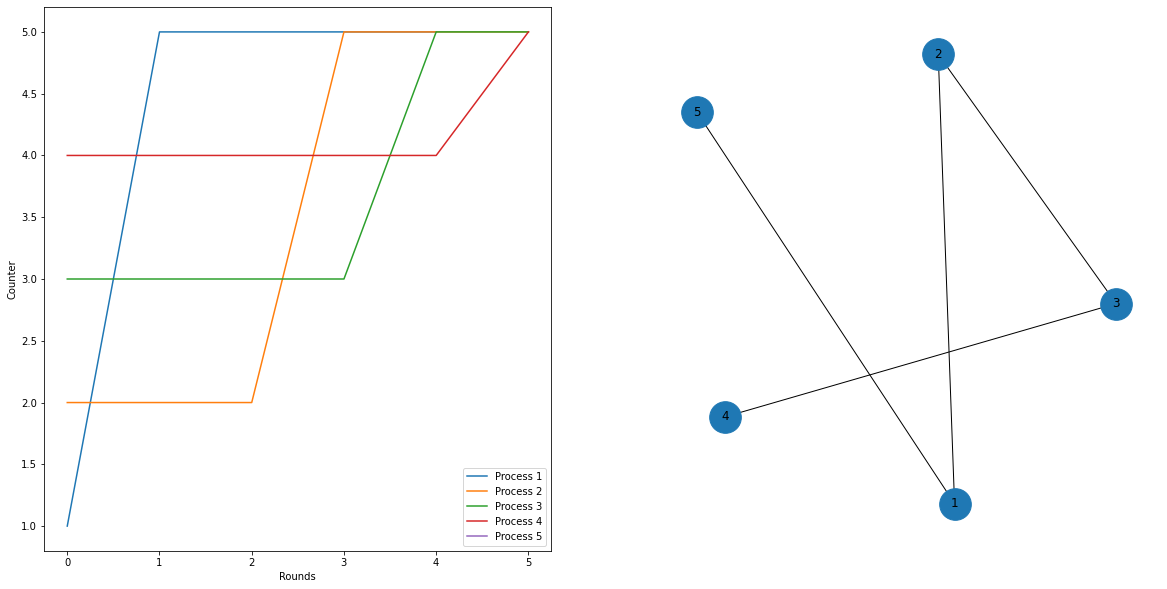

In [7]:
census_algorithm_f(network_t)

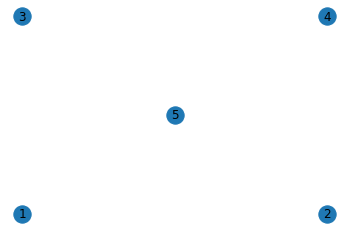

In [8]:
G = nx.Graph()
pos = {1: (0, 0), 2: (1, 0), 3: (0, 1), 4: (1, 1), 5: (0.5,0.5)}

process1 = Process(5, [])
process2 = Process(4, [])
process3 = Process(3, [])
process4 = Process(2, [])
process5 = Process(1, [])


process1.neighbors = [process5]
process2.neighbors = [process4]
process3.neighbors = [process3]
process4.neighbors = [process2]
process5.neighbors = [process1]

process1.visualize(G, pos)
process2.visualize(G, pos)
process3.visualize(G, pos)
process4.visualize(G, pos)
process5.visualize(G, pos)


nx.draw(G, pos)
# plt.show()
network_t1 = [process1, process2, process3, process4,process5 ]


Process 5 sends message 5 to Process 1
Process 4 sends message 4 to Process 2
Process 3 sends message 3 to Process 3
Process 2 sends message 2 to Process 4
Process 1 sends message 1 to Process 5
Process 5 sends message 5 to Process 1
Process 4 sends message 4 to Process 2
Process 3 sends message 3 to Process 3
Process 2 sends message 4 to Process 4
Process 1 sends message 5 to Process 5
Process 5 sends message 5 to Process 1
Process 4 sends message 4 to Process 2
Process 3 sends message 3 to Process 3
Process 2 sends message 4 to Process 4
Process 1 sends message 5 to Process 5
Process 5 sends message 5 to Process 1
Process 4 sends message 4 to Process 2
Process 3 sends message 3 to Process 3
Process 2 sends message 4 to Process 4
Process 1 sends message 5 to Process 5
Process 5 sends message 5 to Process 1
Process 4 sends message 4 to Process 2
Process 3 sends message 3 to Process 3
Process 2 sends message 4 to Process 4
Process 1 sends message 5 to Process 5
Process 5 reports final c

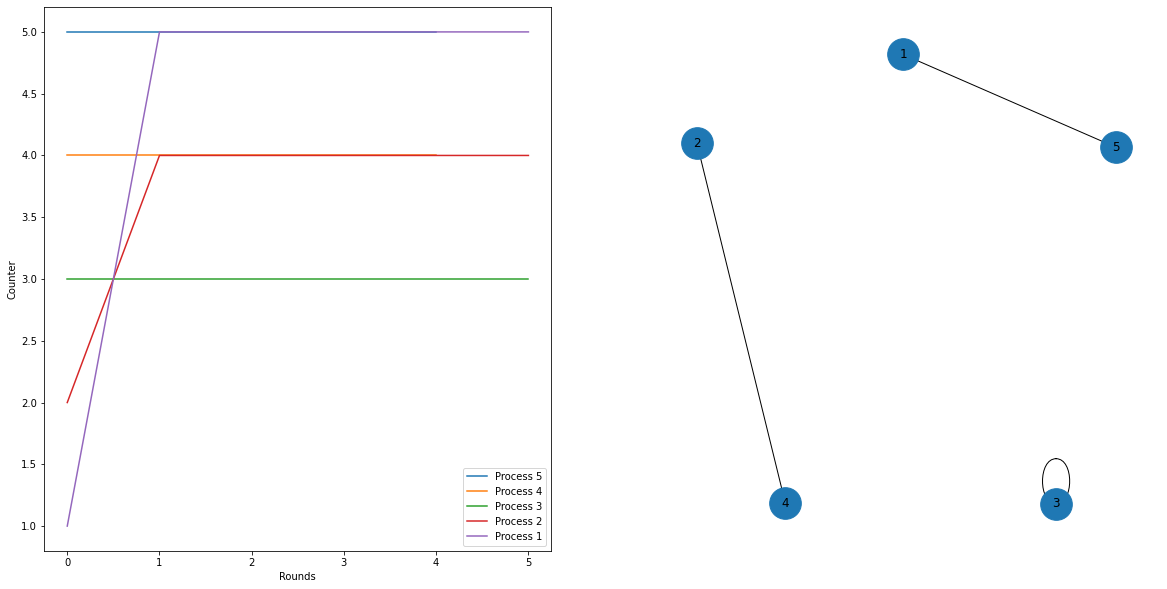

In [9]:
census_algorithm_f(network_t1) 

Process 1 sends message 1 to Process 2
Process 1 sends message 1 to Process 3
Process 2 sends message 2 to Process 1
Process 2 sends message 2 to Process 3
Process 3 sends message 3 to Process 1
Process 3 sends message 3 to Process 2
Process 3 sends message 3 to Process 4
Process 4 sends message 4 to Process 3
Process 1 sends message 4 to Process 2
Process 1 sends message 4 to Process 3
Process 2 sends message 4 to Process 1
Process 2 sends message 4 to Process 3
Process 3 sends message 4 to Process 1
Process 3 sends message 4 to Process 2
Process 3 sends message 4 to Process 4
Process 4 sends message 4 to Process 3
Process 1 sends message 4 to Process 2
Process 1 sends message 4 to Process 3
Process 2 sends message 4 to Process 1
Process 2 sends message 4 to Process 3
Process 3 sends message 4 to Process 1
Process 3 sends message 4 to Process 2
Process 3 sends message 4 to Process 4
Process 4 sends message 4 to Process 3
Process 1 sends message 4 to Process 2
Process 1 sends message 4

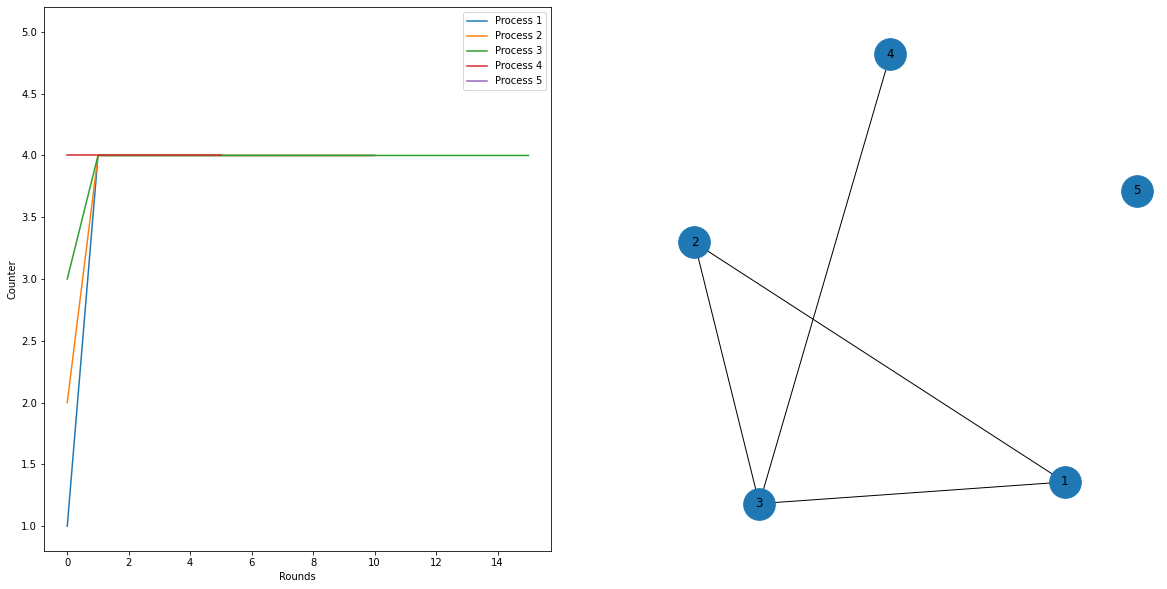

In [10]:
census_algorithm_f(network)

# Census self-stabilization ||  Peer-to-Peer use 

### Peer to Peer 

Peer-to-peer (P2P) refers to a type of network architecture in which individual computers (peers) connect to each other directly, without the need for a central server or authority. In a P2P network, each node can act both as a client and a server, sharing and consuming resources such as files, processing power, and network bandwidth.

P2P networks can be used for a variety of purposes, such as file sharing, content distribution, communication, and distributed computing. One of the key advantages of P2P networks is their decentralization, which makes them more resilient to failures and attacks than traditional client-server architectures.

Examples of P2P networks include BitTorrent for file sharing, Bitcoin for decentralized digital currency, and Skype for peer-to-peer communication.

### Peer to Peer  Function 

In the context of this implementation, the peer-to-peer concept refers to a decentralized network structure where each node in the network is both a sender and receiver of messages, and there is no central server or controller that manages the communication between nodes.

In the peer2peer_census_algorithm function, the network is represented as a list of Process objects, each of which has a neighbors attribute that stores a list of its neighboring processes. The algorithm then proceeds to iteratively execute the following steps for a fixed number of rounds:

Broadcast counter to neighbors
Update counter based on received messages
Clear received messages for next round
By sending messages only to its immediate neighbors, each node in the network acts as both a sender and receiver, forming a peer-to-peer communication structure. The final counters for each node are then reported, and the network is visualized using matplotlib and networkx.

### Creating the Node Class  

In [11]:
class Node:
    def __init__(self, node_id):
        self.id = node_id
        self.neighbors = set()
        self.received_messages = []
    
    def add_neighbor(self, neighbor):
        self.neighbors.add(neighbor)
    
    def receive(self, sender, message):
        self.received_messages.append((sender, message))
    
    def clear_received_messages(self):
        self.received_messages = []
    
    def report(self, final_counter):
        print(f"Node {self.id} has final counter: {final_counter}")

# Create a network of 4 nodes
node0 = Node(0)
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)

node0.add_neighbor(node1)
node0.add_neighbor(node2)
node1.add_neighbor(node0)
node1.add_neighbor(node2)
node1.add_neighbor(node3)
node2.add_neighbor(node0)
node2.add_neighbor(node1)
node2.add_neighbor(node3)
node3.add_neighbor(node1)
node3.add_neighbor(node2)

network_pp = [node0, node1, node2, node3]


In [12]:
def peer2peer_census_algorithm(network):
    """
    Implements the census self-stabilization algorithm for a peer-to-peer network.
    
    Parameters:
    network (list): A list of Node objects representing the nodes in the network.
    
    Returns:
    None
    """
    # Initialize counters for each node in the network
    counters = {node: [node.id] for node in network}
    
    # Initialize visualization
    G = nx.Graph()
    for node in network:
        G.add_node(node.id)
    pos = nx.spring_layout(G)
    
    # Run the algorithm for a fixed number of rounds
    num_rounds = 7
    for i in range(num_rounds):
        for node in network:
            # Broadcast counter to neighbors
            for neighbor in node.neighbors:
                neighbor.receive(node, counters[node][-1])
                G.add_edge(node.id, neighbor.id)
                
            # Update counter based on received messages
            for message in node.received_messages:
                neighbor_id, value = message
                counters[node].append(max(counters[node][-1], value))
            
            # Clear received messages for next round
            node.clear_received_messages()
    
    # Report final counters for each node
    for node in network:
        node.report(counters[node][-1])
    
    # Visualize the network
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    for node in network:
        plt.plot(counters[node], label=f'Node {node.id}')
    plt.xlabel('Rounds')
    plt.ylabel('Counter')
    plt.legend()
    
    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_size=1000)
    plt.show()


Node 0 has final counter: 3
Node 1 has final counter: 3
Node 2 has final counter: 3
Node 3 has final counter: 3


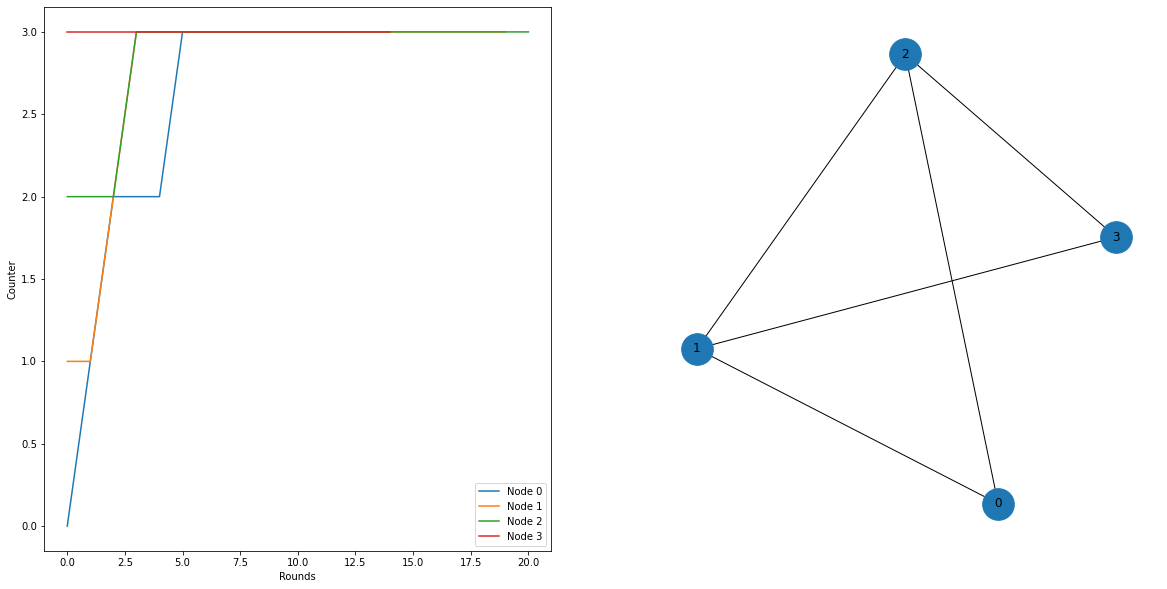

In [13]:
peer2peer_census_algorithm(network_pp)

In [14]:
# Create a network of 4 nodes
node0 = Node(0)
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)

node0.add_neighbor(node1)
node1.add_neighbor(node2)
node2.add_neighbor(node3)
node3.add_neighbor(node0)

network_pp1 = [node0, node1, node2, node3]


Node 0 has final counter: 3
Node 1 has final counter: 3
Node 2 has final counter: 3
Node 3 has final counter: 3


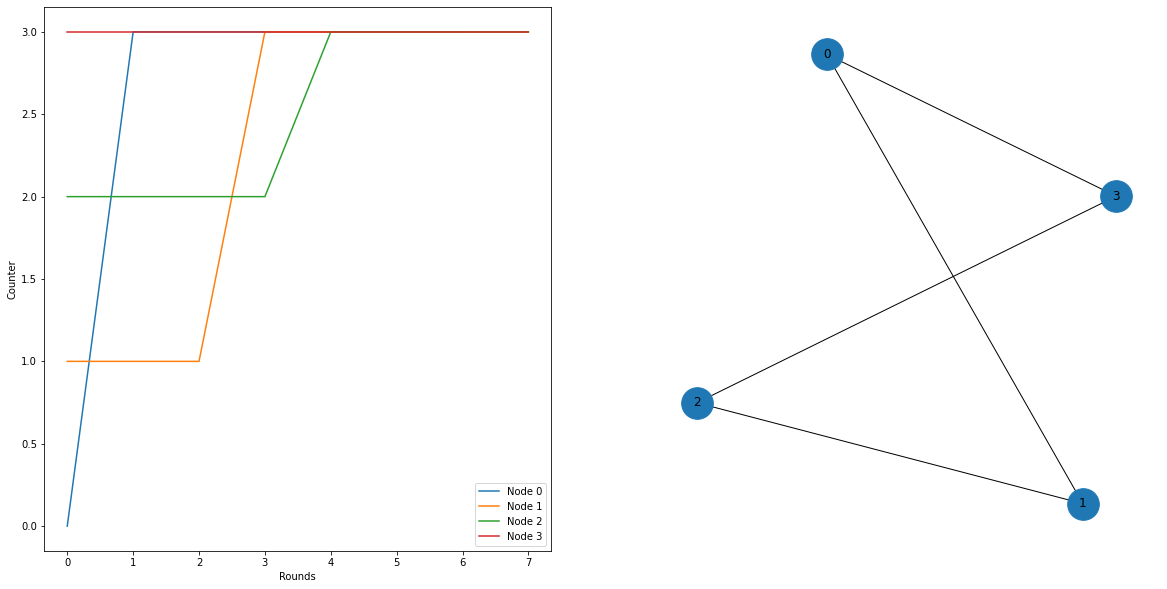

In [15]:
peer2peer_census_algorithm(network_pp1)

In [16]:
# Create a network of 4 nodes
node0 = Node(0)
node1 = Node(1)
node2 = Node(2)
node3 = Node(3)

node0.add_neighbor(node1)
node1.add_neighbor(node2)
node2.add_neighbor(node3)

network_pp2 = [node0, node1, node2, node3]


Node 0 has final counter: 0
Node 1 has final counter: 1
Node 2 has final counter: 2
Node 3 has final counter: 3


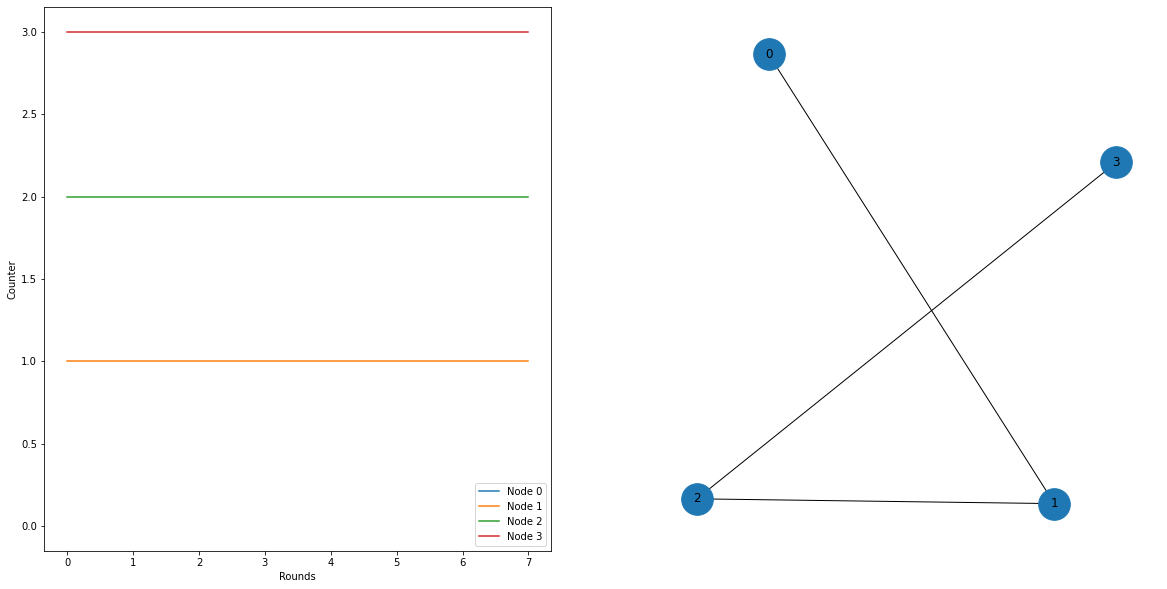

In [17]:
peer2peer_census_algorithm(network_pp2)